# Laboratory #01 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

### **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)


import numpy as np #needed to manage numerical arrays and matrices
from matplotlib import pyplot as plt #needed in order to display images and graphics
from skimage import data #needed in order to work with several presotred in skimage data
from skimage import exposure #the histogram is in this library
from skimage import filters # a lot of filters we will use are predefined, check it in https://scikit-image.org/docs/dev/api/skimage.filters.html
from skimage import io #we need it in order to read and store imahes
from skimage import morphology #morphology library has defined different 
from skimage import transform # needed for change shapes of images and textures
from skimage.color import rgb2gray #to transform a color image to grayscale

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![black_and_white_patches.png](https://drive.google.com/uc?export=view&id=1Iuf870gS6DuFzMtnXs53DLuiXy0oARaw)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


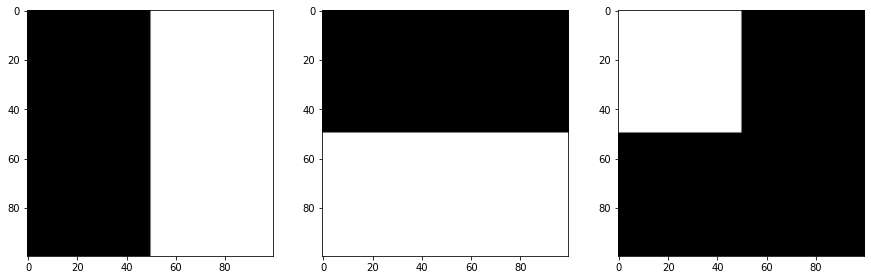

In [ ]:
# solution

fig, plot = plt.subplots(1,3, figsize=(15,7)) #1x3 subplots

#image1
image1 = np.zeros((100,100), dtype=np.uint8)
image1[:,50:]= 255

#image2
image2 = np.zeros((100,100), dtype=np.uint8)
image2[50:,:]= 255

#image3
image3 = np.zeros((100,100), dtype=np.uint8)
image3[:50,:50]= 255

plot[0].imshow(image1, cmap='gray')
plot[1].imshow(image2, cmap='gray')
plot[2].imshow(image3, cmap='gray')
fig.show()

*   Use the above three images to create the following image

![color_patches.png](https://drive.google.com/uc?export=view&id=1UxmFHToC4TUjgtB7UQMbB3DM3RIZlgBZ)

*Hint: Remember channels and color spaces*

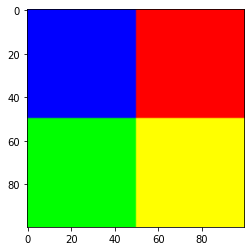

In [ ]:
# solution

sol = np.zeros((100,100,3), dtype=np.uint8)
sol[:,:,0] = image1 #red
sol[:,:,1] = image2 #green
sol[:,:,2] = image3 #blue
plt.imshow(sol)
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the  folder 'images'

![sillas.jpg](https://drive.google.com/uc?export=view&id=1Ged9FdDWIcipbNxNatGgCZyRdQvcGtoG)

*   Extract individual channels and plot them using the matplotlib subplots command.



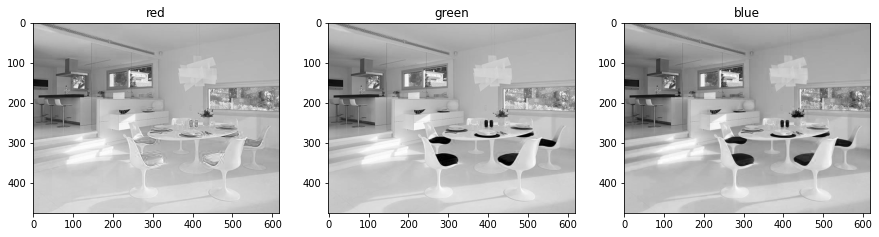

In [ ]:
# solution
image = io.imread('/content/drive/MyDrive/CV2/images/sillas.jpg') #read 'sillas.jpg'
fig, plot = plt.subplots(1,3, figsize=(15,7)) #1x3 subplots
plot[0].imshow(image[:,:,0],cmap='gray') #red
plot[0].set_title('red')
plot[1].imshow(image[:,:,1],cmap='gray') #green
plot[1].set_title('green')
plot[2].imshow(image[:,:,2],cmap='gray') #blue
plot[2].set_title('blue')
fig.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using  the matplotlib subplots command.

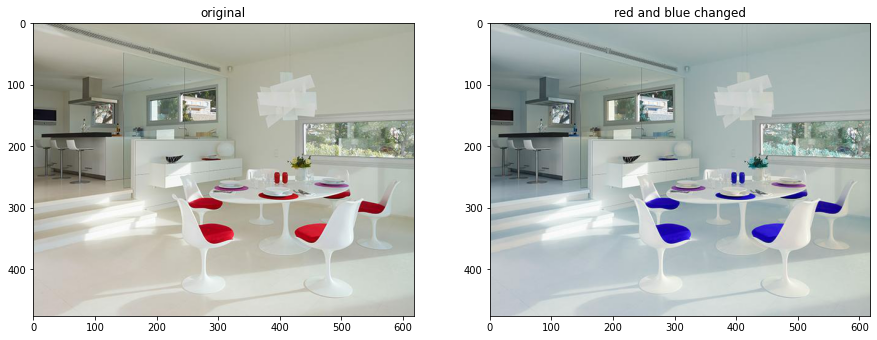

In [ ]:
# solution
fig, plot = plt.subplots(1,2, figsize=(15,7)) #1x2 subplots

#original
plot[0].imshow(image)
plot[0].set_title('original')

#modified
image2 = image.copy()
image2[:,:,0] = image[:,:,2]
image2[:,:,2] = image[:,:,0]
plot[1].imshow(image2)
plot[1].set_title('red and blue changed')

fig.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think how to apply image masks!!!*

![model_and_coat.png](https://drive.google.com/uc?export=view&id=1DOieJOrfwe34z0-3EEBVyX1Ac45sb5SN)


In [ ]:
# solution

#reading images from the folder 'images'
coat = io.imread('/content/drive/MyDrive/CV2/images/coat.png')
text1 = io.imread('/content/drive/MyDrive/CV2/images/texture.png')
text2 = io.imread('/content/drive/MyDrive/CV2/images/texture2.png')
text3 = io.imread('/content/drive/MyDrive/CV2/images/texture3.jpg')
model = io.imread('/content/drive/MyDrive/CV2/images/model.png')

Revising how images are stored we notice that 'coat' is saved in a $1188 \cdot 915 \cdot 4$ matrix, this means that it is in RGBA. The three first components are related to the color, and in black pixels are all 0. However, in this case, the fourth component which is the transparency is always $255$.

To do this exercise we will sum all four components for each pixel, then the black ones will add up to $255$ and the non-black will add to more than $255$. As we want a mask with non black pixels we will create two matrix, the first one with dtype=uint8, so that its components are between 0 and 255, and the second one with dtype=uint64, and its components will be greater than or equal to $255$. Both matrix will have $255$ in black pixels, however, in non-black pixels will be different.

In [ ]:
coat_2D= coat.sum(axis=-1).astype(np.uint8) #dtype=uint8
black_value = coat.sum(axis=-1) #dtype=uint64
mask_2D= (coat_2D != black_value) #non-black components arethe different

Now we can join the 'coat' and 'model' images:

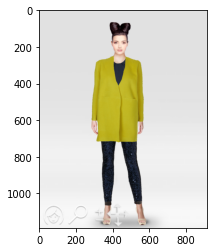

In [ ]:
model[mask_2D]=coat[mask_2D] #pixels corresponding to the coat are changed
plt.imshow(model)
plt.show()

We can use the same mask that we created for the coat to apply it for the textures. First of all, we notice that the textures only have three color components, whereas the model has four, so the first step will be converting the model to RGB. Then, we notice that the texture is smaller, so we resize it. Finally, we can add the textures to the model.

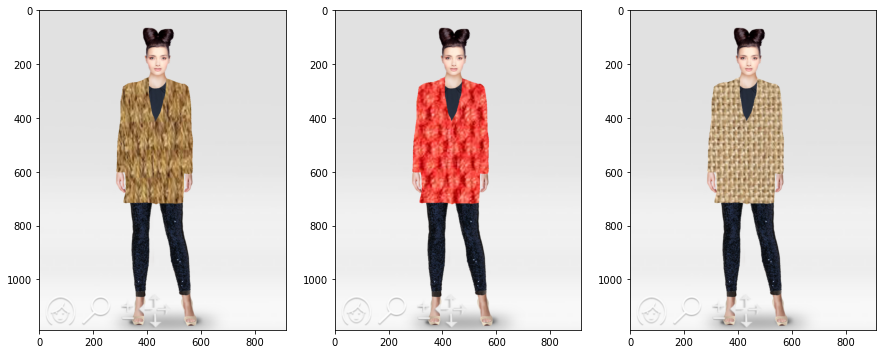

In [ ]:
fig, plot = plt.subplots(1,3, figsize=(15,7))

#Copy the image 3 times with RGB
model3D1 = model[:,:,:-1].copy()
model3D2 = model[:,:,:-1].copy()
model3D3 = model[:,:,:-1].copy()

#Resize the textures so that they have the same size as the models
text1 = transform.resize(text1, model3D1.shape, preserve_range=True)
text2 = transform.resize(text2, model3D2.shape, preserve_range=True)
text3 = transform.resize(text3, model3D3.shape, preserve_range=True)

#Add textures
model3D1[mask_2D] = text1[mask_2D]
model3D2[mask_2D] = text2[mask_2D]
model3D3[mask_2D] = text3[mask_2D]

plot[0].imshow(model3D1)
plot[1].imshow(model3D2)
plot[2].imshow(model3D3)
fig.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




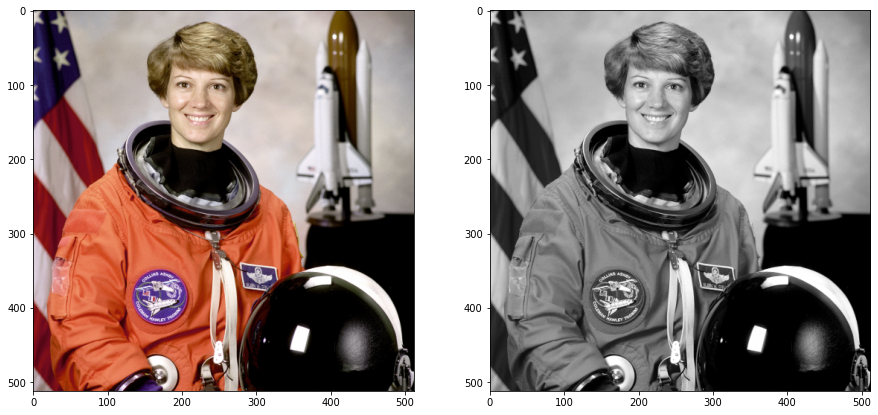

In [ ]:
# solution

fig, plot = plt.subplots(1,2, figsize=(15,7))

#astronaut image
img = data.astronaut()
plot[0].imshow(img)

#astronaut grayscale
img_gray = rgb2gray(img)
plot[1].imshow(img_gray, cmap='gray')

fig.show()


To change from color to grayscale we use rgb2gray function, implemented in skimage.

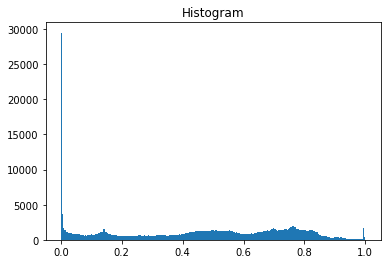

In [ ]:
#histogram
h1,h2=exposure.histogram(img_gray)
plt.bar(h2,h1, width=1/256)
plt.title('Histogram')
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using the matplotlib plot command and the matplotlib bar command.

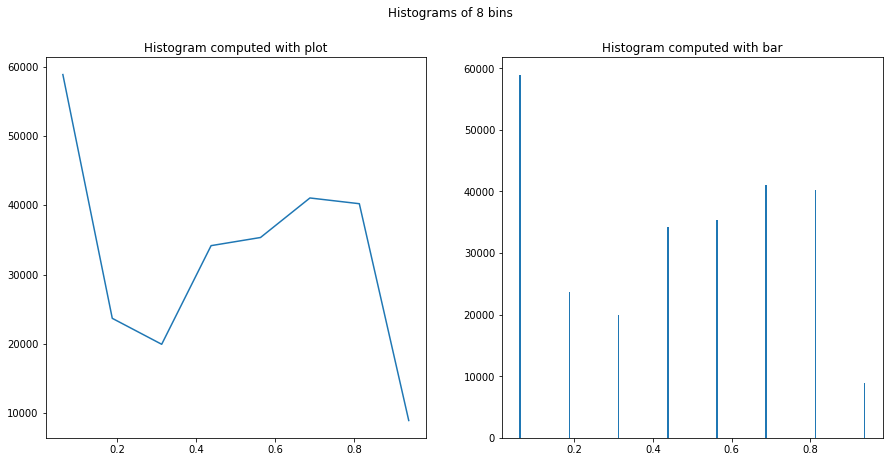

In [ ]:
# solution

fig, plot = plt.subplots(1,2, figsize=(15,7))
fig.suptitle('Histograms of 8 bins')

h1,h2=exposure.histogram(img_gray, nbins=8)
plot[0].plot(h2,h1)
plot[0].set_title('Histogram computed with plot')

num=(h2-h2[0])*256
num=num/256+h2[0]
plot[1].bar(h2,h1, width=1/256)
plot[1].set_title('Histogram computed with bar')

fig.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

When we change the bin count, colors are grouped in less groups, we have less shades and so each one has more frequency. With the changed bin count histogram we can see also see how the brightness is distributed (if there are more light or dark colors), however we lose information. The correct bin count would be the amount of different values that a pixel can have (if a pixel is stored using 8 bits then $2^8=256$ would be the optimal).

As mentioned, if the bin count is very low we lose information, but in the other side, if it is very high, there may be frequencies that have their bin, but are not used in the image.


...

*   Compute the histogram of the color image (without converting it to grayscale).
*   Plot the total histogram as well as the histogram for each channel (show them  with the corresponding titles for each histogram).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  """


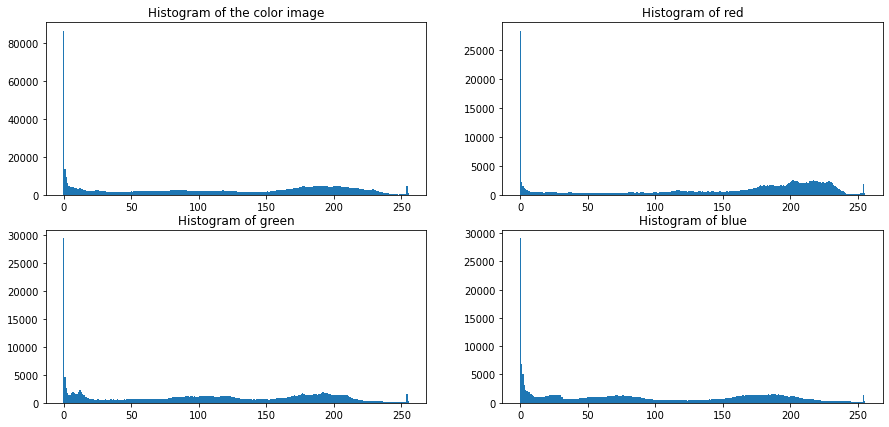

In [ ]:
#solution

fig, plot = plt.subplots(2,2, figsize=(15,7))

h1,h2=exposure.histogram(img)
plot[0][0].bar(h2,h1, width=1)
plot[0][0].set_title('Histogram of the color image')

h1,h2=exposure.histogram(img[:,:,0])
plot[0][1].bar(h2,h1, width=1)
plot[0][1].set_title('Histogram of red')

h1,h2=exposure.histogram(img[:,:,1])
plot[1][0].bar(h2,h1, width=1)
plot[1][0].set_title('Histogram of green')

h1,h2=exposure.histogram(img[:,:,2])
plot[1][1].bar(h2,h1, width=1)
plot[1][1].set_title('Histogram of blue')
fig.show()

We realize that the frequency of each brightness of the color image is the sum of the brightness of each channel.

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



We will solve this exercise in two different ways: First converting the image to grayscale and then with the original color image.

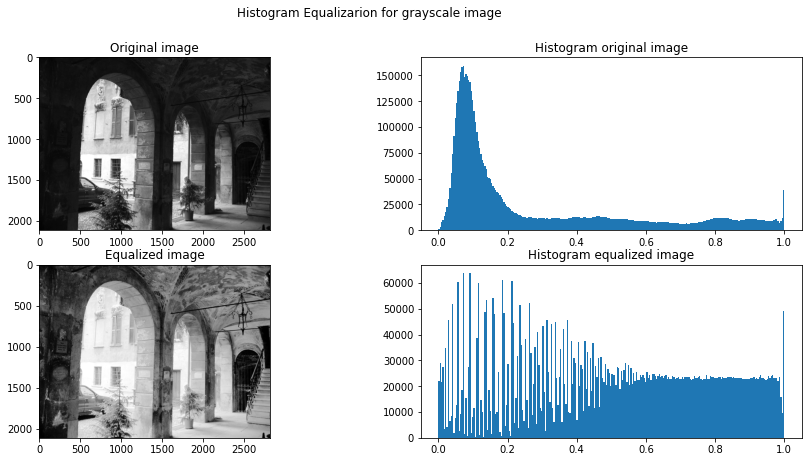

In [ ]:
# solution

#reading image
image=io.imread('/content/drive/MyDrive/CV2/images/aquatermi_lowcontrast.jpg')

#converting it to grayscale
img_gray = rgb2gray(image)

#histogram original image
h1,h2=exposure.histogram(img_gray)

#equalized image
equalized=exposure.equalize_hist(img_gray)

#histogram equalized image
h3,h4=exposure.histogram(equalized)

#plots
fig, axs = plt.subplots(2, 2, figsize=(15,7))
fig.suptitle('Histogram Equalizarion for grayscale image')
axs[0,0].imshow(img_gray, cmap='gray')
axs[0,0].set_title('Original image')
axs[0,1].bar(h2,h1, width=1/256)
axs[0,1].set_title('Histogram original image')
axs[1,0].imshow(equalized, cmap='gray')
axs[1,0].set_title('Equalized image')
axs[1,1].bar(h4,h3, width=1/256)
axs[1,1].set_title('Histogram equalized image')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  # Remove the CWD from sys.path while we load stuff.


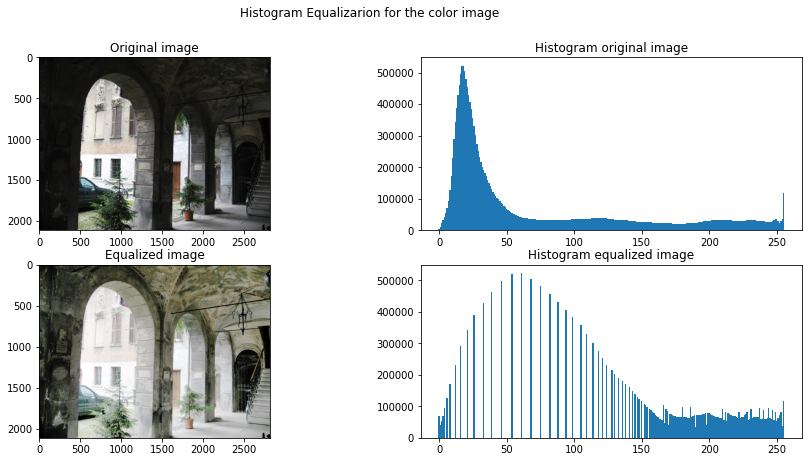

In [ ]:
# solution

#histogram original image
h1,h2=exposure.histogram(image)

#equalized image
equalized=exposure.equalize_hist(image)

#histogram equalized image
h3,h4=exposure.histogram(equalized)

#plots
fig, axs = plt.subplots(2, 2, figsize=(15,7))
fig.suptitle('Histogram Equalizarion for the color image')
axs[0,0].imshow(image)
axs[0,0].set_title('Original image')
axs[0,1].bar(h2,h1, width=1)
axs[0,1].set_title('Histogram original image')
axs[1,0].imshow(equalized)
axs[1,0].set_title('Equalized image')
axs[1,1].bar(h2,h3, width=1)
axs[1,1].set_title('Histogram equalized image')
fig.show()


*   The above function in skimage.exposure uses cumulative distribution function and interpolation technique to normalize the histogram. How is it different from linear contrast stretch (contrast enhancement - see theory slides)?


**Solution**

This function calculates the distribution function of the original image and then uses it as the transformation function. Therefore, what this transformation does is distributing the colors in such a way that the average color is the average in brightness and in average all intensities are equally common.

Linear contrast stretch uses the following predefined function:
$$ BV_{out}=\left( \frac{BV_{in}-\min_k}{\max_k-min_k} \right) quant_k$$
where $BV_{in}$ is the original value, $\min_k$ is the minimum value of the image, $\max_k$ is the maximum value of the image, $quant_k$ is the range of possible different values and $BV_{out}$ is the value after the transformation. What this function does is stretches the image's brighteness so that the range of colors goes from the minimum possible to the maximum possible. In the case of this image, this transformation would not make any difference, as there are very dark (0) and very light (1 or 255) colors, that is to say, the range of brightness is all.


### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch or contrast enhancement (Do not use an inbuilt function). 
*   Provide grayscale image array and the bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



In [ ]:
# solution

def linear_contrast_stretch(image, quant):
  min=image.min()
  max=image.max()
  return (image-min)/(max-min)*quant

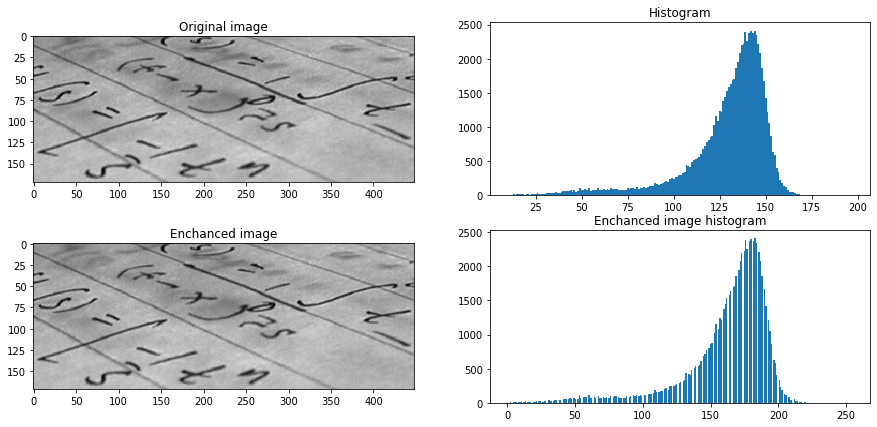

In [ ]:
image=data.text()
img_gray = rgb2gray(image)

fig, plot = plt.subplots(2, 2, figsize=(15,7))

#original image
plot[0][0].imshow(img_gray, cmap='gray')
plot[0][0].set_title('Original image')

#histogram
h1,h2=exposure.histogram(img_gray)
plot[0][1].bar(h2,h1, width=1)
plot[0][1].set_title('Histogram')

#enchanced image
enchanced=linear_contrast_stretch(img_gray,255)
plot[1][0].imshow(enchanced, cmap='gray')
plot[1][0].set_title('Enchanced image')

#enchanced image histogram
h1,h2=exposure.histogram(enchanced)
plot[1][1].bar(h2,h1, width=1)
plot[1][1].set_title('Enchanced image histogram')

fig.show()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (command selem) of radius 20. *Hint: Structuring elements (command selem) are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




**We did this exercise in two different ways. First we apply the filters to previously filtered images and then we apply all the filters to the initial image.**

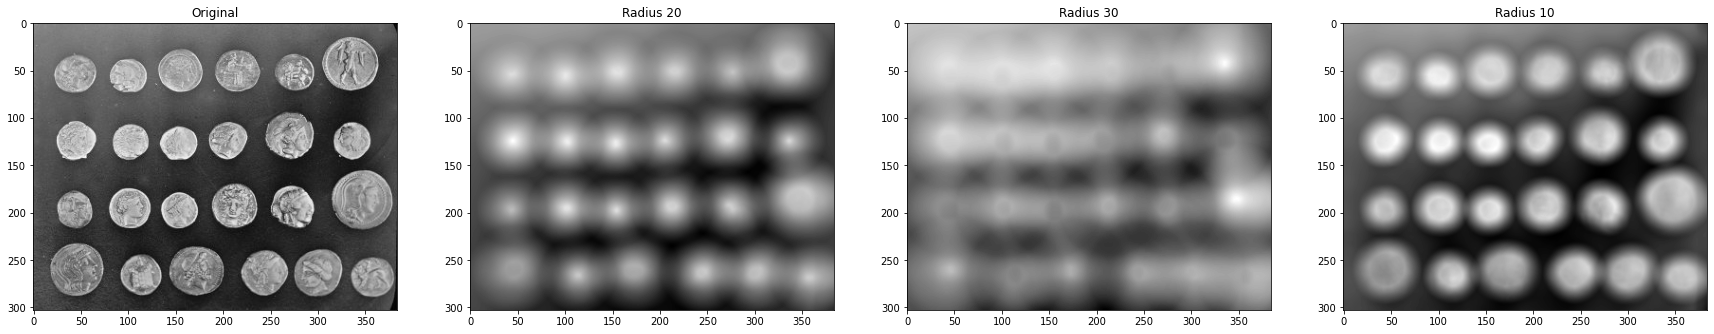

In [ ]:
# solution
fig, plots = plt.subplots(1,4,figsize=(30,14))

#coins image
coins = data.coins()
plots[0].imshow(coins, cmap='gray')
plots[0].set_title('Original')

#disk structuring element of radius 20
fprint = morphology.selem.disk(20)

#mean filter
result = filters.rank.mean(coins, selem=fprint)
plots[1].imshow(result, cmap='gray')
plots[1].set_title('Radius 20')

#radius of 30
fprint = morphology.selem.disk(30)
result = filters.rank.mean(coins, selem=fprint) 
plots[2].imshow(result, cmap='gray')
plots[2].set_title('Radius 30')

#radius of 10
fprint = morphology.selem.disk(10) 
result = filters.rank.mean(coins, selem=fprint) 
plots[3].imshow(result, cmap='gray')
plots[3].set_title('Radius 10') 

fig.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

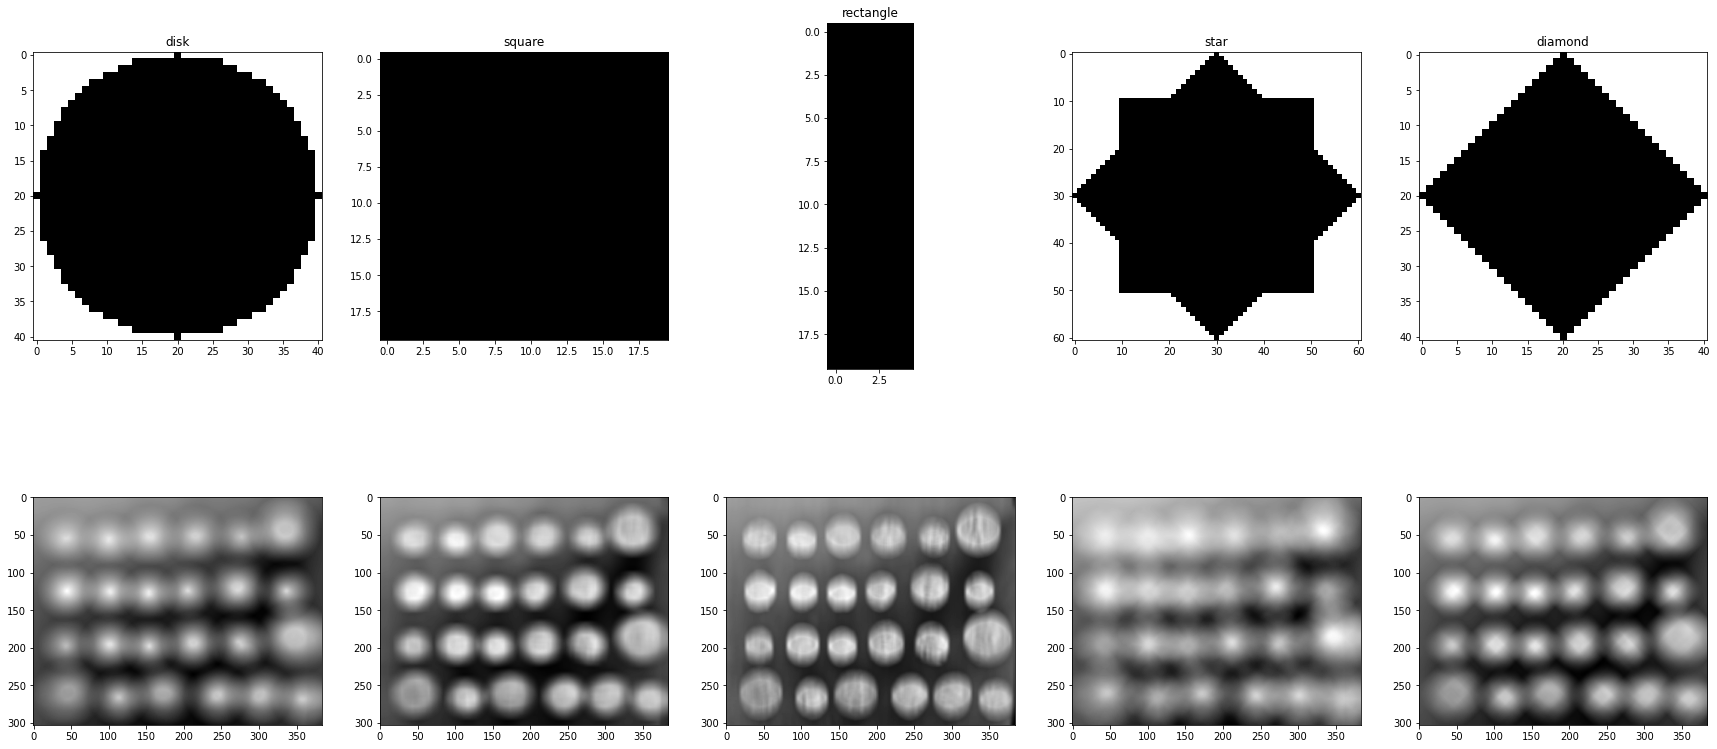

In [ ]:
# solution

fig, plots = plt.subplots(2,5, figsize=(30,14))

#disk
fprintds = morphology.selem.disk(20)
resultds = filters.rank.mean(coins, selem=fprintds)
plots[0][0].imshow(fprintds, cmap='Greys')
plots[1][0].imshow(resultds, cmap='gray')
plots[0][0].set_title('disk')

#square
fprintsq = morphology.selem.square(20)
resultsq = filters.rank.mean(coins, selem=fprintsq)
plots[0][1].imshow(fprintsq, cmap='gray')
plots[1][1].imshow(resultsq, cmap='gray')
plots[0][1].set_title('square')

#rectangle
fprintr = morphology.selem.rectangle(20,5)
resultr = filters.rank.mean(coins, selem=fprintr)
plots[0][2].imshow(fprintr, cmap='gray')
plots[1][2].imshow(resultr, cmap='gray')
plots[0][2].set_title('rectangle')

#star
fprintst = morphology.selem.star(20)
resultst = filters.rank.mean(coins, selem=fprintst)
plots[0][3].imshow(fprintst, cmap='Greys')
plots[1][3].imshow(resultst, cmap='gray')
plots[0][3].set_title('star')

#diamond
fprintdm = morphology.selem.diamond(20)
resultdm = filters.rank.mean(coins, selem=fprintdm)
plots[0][4].imshow(fprintd, cmap='Greys')
plots[1][4].imshow(resultd, cmap='gray')
plots[0][4].set_title('diamond')

fig.show()


* How does changing the radius of disk affect the smoothing functionality?

**Solution**

The larger the raduius is, the larger is the mask and therefore the higher is the smoothing functionality.


  * What is the observed behaviour with different structuring element?



**Solution**

The different structuring correspond to the different shapes of the mask, or equivalently the type of metrics:

When we use a disk, the mask has the shape of a circle, and all the pixels at an Eulidean distance less than the radius from a specific pixel are considered to calculate the mean.

When we use a square, the mask has the shape of a square, and all the pixels at a Chevishev distance less than the radius from a specific pixel are considered to calculate the mean.

When we use a rectangle, the mask has the shape of a rectangle of a determined width and height, and all the pixels inside this rectangle centered on a specific pixel are used to calculate the mean. 

When we use a star, the mask has the shape of a star, and all the pixels inside a star of a determinated radius are considered to calculate the mean.

When we use a diamond, the mask has the shape of a diamond, and all the pixels at a Manhattan distance less than the radius from a specific pixel are considered to calculate the mean.

In the case of this example, the square and rectangle are the shapes that provide better results, this is because the coins are ordered in a quadricular pattern. However, in general, the best would be to use a disk, as it considers all nearest points coming from any angle.



*   What is the difference between mean filter and gaussian filter?




**Solution**

Mean filter considers a mask of a specific shape and size and calculates the mean among all the pixels in the mask, this means that all píxels have the same importance.
Mean filter is optimal for reducing random noise in the spatial domain (image space). However, it is the worst filter for frequency domain, with little ability to separate one band of frequencies from another. 

Gaussian filter weights the pixels in a mask, and the points that are closer to the central pixels have more weight, this weight is distributed using a Gaussian function.
Gaussian filter has better performance in the frequency domain.




---

## **End of P1: Image operators and filters**

Deadline for P1 submission in CampusVirtual is: **Monday, the 18th of October, 2021**
